# Characterization of Systems in the Time Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Eigenfunctions

An [eigenfunction](https://en.wikipedia.org/wiki/Eigenfunction) of a system is defined as the input signal $x(t)$ which produces the output signal $y(t) = \mathcal{H}\{ x(t) \} = \lambda \cdot x(t)$ with $\lambda \in \mathbb{C}$. The weight $\lambda$ associated with $x(t)$ is known as scalar eigenvalue of the system. Hence, besides a weighting factor, an eigenfunction is not modified by passing through the system.

[Complex exponential signals](../continuous_signals/standard_signals.ipynb#Complex-Exponential-Signal) $e^{s t}$ with $s \in \mathbb{C}$ are eigenfunctions of linear time-invariant (LTI) systems. This can be proven by applying the properties of LTI systems. Lets assume a generic LTI system with input signal $x(t) = e^{s t}$ and output signal $y(t) = \mathcal{H}\{ x(t) \}$. The response of the LTI system to the shifted input signal $x(t-\tau) = e^{s (t-\tau)}$ reads

\begin{equation}
y(t - \tau) = \mathcal{H}\{ x(t-\tau) \} = \mathcal{H}\{ e^{-s \tau} \cdot e^{s t}  \}
\end{equation}

due to the implied shift-invariance. Now considering the implied linearity this can be reformulated as

\begin{equation}
y(t - \tau) =  e^{-s \tau} \cdot \mathcal{H}\{ e^{s t}  \} = e^{-s \tau} \cdot y(t)
\end{equation}

It is straightforward to show that $y(t) = \lambda e^{st}$ fulfills above equation

\begin{equation}
\lambda e^{s t} e^{-s \tau} = e^{-s \tau} \lambda e^{st}
\end{equation}

**Example**

An LTI system whose input/output relation is given by the following inhomogeneous linear ordinary differential equation (ODE) with constant coefficients is investigated

\begin{equation}
a_0 y(t) + a_1 \frac{d y(t)}{dt} + a_2 \frac{d^2 y(t)}{dt^2} = x(t)
\end{equation}

with $a_i \in \mathbb{R} \quad \forall i$. In the remainder, the output signal $y(t)$ of the system is computed by explicit solution of the ODE for $x(t) = e^{s t}$ as input signal. Integration constants are discarded for ease of illustration.

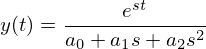

In [4]:
import sympy as sym
%matplotlib inline
sym.init_printing()

t, s, a0, a1, a2 = sym.symbols('t s a:3')
x = sym.exp(s * t)
y = sym.Function('y')(t)

ode = sym.Eq(a0*y + a1*y.diff(t) + a2*y.diff(t, 2), x)
solution = sym.dsolve(ode)
solution.subs({'C1': 0, 'C2': 0})

**Exercises**

* Is the complex exponential signal an eigenfunction of the system?
* Introduce $x(t) = e^{s t}$ and $y(t) = \lambda \cdot e^{s t}$ into the ODE and solve manually for the eigenvalue $\lambda$. How is the result related to above result derived by solving the ODE?
* Can you generalize your findings to an ODE of arbitrary order?

**Example**

The following inhomogeneous linear ODE with time-dependent coefficient is considered as an example for a **time-variant** but linear system

\begin{equation}
t \cdot \frac{d y(t)}{dt} = x(t)
\end{equation}

The output signal $y(t)$ of the system for a complex exponential signal at the input $x(t) = e^{st}$ is computed by explicit solution of the ODE. Again integration constants are discarded.

In [5]:
ode = sym.Eq(t*y.diff(t), x)
solution = sym.dsolve(ode)
solution.subs('C1', 0)

Note, $\text{Ei}(\cdot)$ denotes the [exponential integral](http://docs.sympy.org/latest/modules/functions/special.html#sympy.functions.special.error_functions.Ei). The response $y(t)$ of the time-variant system is not equal to a weighted complex exponential signal $\lambda \cdot e^{s t}$. It can be concluded that complex exponentials are no eigenfunctions of this particular time-variant system.

**Example**

A final example considers the following non-linear inhomogeneous ODE with constant coefficients

\begin{equation}
\left( \frac{d y(t)}{dt} \right)^2 = x(t)
\end{equation}

as example for a **non-linear** but time-invariant system. Again, the output signal $y(t)$ of the system for a complex exponential signal at the input $x(t) = e^{st}$ is computed by explicit solution of the ODE. As before, integration constants are discarded.

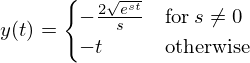

In [6]:
ode = sym.Eq(y.diff(t)**2, x)
solution = sym.dsolve(ode)
solution.subs('C1', 0)

Obviously for this non-linear system complex exponential signals are no eigenfunctions.

## Transfer Function

The complex eigenvalue $\lambda$ constitutes the weight of a complex exponential signal $e^{st}$ (using complex frequency $s$) experiences when passing through an LTI system. It is commonly termed as [*transfer function*](https://en.wikipedia.org/wiki/Transfer_function) and is denoted by $H(s)=\lambda(s)$. Using this definition, the output signal $y(t)$ of an LTI system for a complex exponential signal at the input reads

\begin{equation}
y(t) = \mathcal{H} \{ e^{st} \} = H(s) \cdot e^{st}
\end{equation}

Note that the concept of the transfer function is directly linked to the linearity and time-invariance of a system. Only in this case, complex exponential signals are eigenfunctions of the system and $H(s)$ describes the properties of an LTI system with respect to these.

Above equation can be rewritten in terms of the magnitude $| H(s) |$ and phase $\varphi(s) = \arg \{ H(s) \}$ of the complex transfer function $H(s)$

\begin{equation}
y(t) = | H(s) | \cdot e^{s t + j \varphi(s)}
\end{equation}

The magnitude $| H(s) |$ provides the frequency dependent attenuation/amplification of the eigenfunction $e^{st}$ by the system, while $\varphi(s)$ provides the introduced phase-shift.

## Link between Transfer Function and Impulse Response

In order to establish a link between the transfer function $H(s)$ and the impulse response $h(t)$, the output signal $y(t) = \mathcal{H} \{ x(t) \}$ of an LTI system with input signal $x(t)$ is considered. It is given by convolving the input signal with the impulse response

\begin{equation}
y(t) = x(t) * h(t) = \int_{-\infty}^{\infty} x(t-\tau) \cdot h(\tau) \; d\tau
\end{equation}

For a complex exponential signal as input $x(t) = e^{st}$, the output of an LTI system is given as $y(t) = \mathcal{H} \{ e^{st} \} = H(s) \cdot e^{st}$. Introducing both signals into the convolution integral yields

\begin{equation}
H(s) \cdot e^{st} = \int_{-\infty}^{\infty} e^{st} e^{-s \tau} \cdot h(\tau) \; d\tau
\end{equation}

which after canceling $e^{s t}$ (the integral depends not on $t$) results in

\begin{equation}
H(s) = \int_{-\infty}^{\infty} h(\tau) \cdot e^{-s \tau}  \; d\tau
\end{equation}

under the assumption that the integral converges.
The transfer function $H(s)$ can be computed from the impulse response $h(t)$ by integrating over the impulse response multiplied with the complex exponential function $e^{- s \tau}$. This constitutes an integral transformation, which is later introduced in more detail as [Laplace transform](https://en.wikipedia.org/wiki/Laplace_transform).
Usually the temporal variable $t$ is then used

\begin{equation}
H(s) = \int_{-\infty}^{\infty} h(t) \cdot e^{-s t}  \; d t
\end{equation}
rather than $\tau$ which remained from the convolution integral calculus.


**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.